## 神经网络和反向传播算法
机器学习中的神经网络是指“神经网络学习”，或者说，是机器学习与神经网络这两个学科领域的交叉部分，  
神经网络中最基本的成分是神经元(neuron)模型。在生物神经网络中，每个神经元与其他神经元相连，当它"兴奋"时，就会向相连的神经元发送化学物质，从而改变这些神经元内的电位；如果某神经元的电位超过了一个"阈值"，那么它就会被激活，即"兴奋"起来，向其他神经元发送化学物质。  
- 简单的“M—P 神经元模型”(如下图)
在这个模型中，神经元接收到来自n个其他神经元传递过来的输入信号，这些信号通过带权重的连接进行传递，神经元接收到的总输入值将与神经元的阈值进行比较，然后通过"激活函数"处理产生神经元的输出。

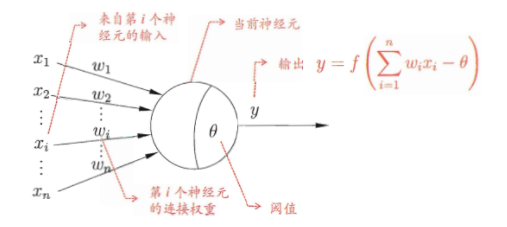

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/5.png")

## 1.预备知识
### 1.1常见的几种激活函数（具体用到再补充）
- 阶跃函数，它将输入值映射为输出值0或1，1对应神经元兴奋，0对应抑制。但它具有不连续、不光滑等不好的性质，实际中常用sigmoid函数。  
- sigmoid函数，也称logistic函数，将可能在较大范围内变化的输入值挤压到(0,1)输出范围内，因此有时也称挤压函数(squashing function),$f(x)=\dfrac{1}{1+e^{-x}}$
- tanh: $f(x)=\tanh(x)$
- softmax: $f(x)= log(1+\exp{x})$
- ReLu: $f(x)=\max(0,x)$

### 1.2为什么要使用激活函数
激活函数，并不是去激活什么，而是指如何把“激活的神经元的特征”通过函数把特征保留并映射出来（保留特征，去除一些数据中是的冗余），这是神经网络能解决非线性问题关键。
- 如果不用激活函数，相当于激活函数$f(x)=x$，每一层输出都是上层输入的线性函数,与只有一个隐藏层效果相当，这种情况就是多层感知机了(MLP).  
  如果使用的话，激活函数给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型中。
- 构建稀疏矩阵，也就是稀疏性，这个特性可以去除数据中的冗余，最大可能保留数据的特征，也就是大多数为0的稀疏矩阵来表示。  
  其实这个特性主要是对于Relu，它就是取的max(0,x)，因为神经网络是不断反复计算，实际上变成了它在尝试不断试探如何用一个大多数为0的矩阵来尝试表达数据特征，结果因为稀疏特性的存在，反而这种方法变得运算得又快效果又好了。
### 1.3 注意：
用sigmoid和tanh作为激活函数的话，一定要注意对输入进行归一化／标准化，否则激活后的值都会进入平坦去，使隐层的输出全部趋同，但是 ReLU 并不需要输入归一化来防止它们达到饱和。


$\delta w_i=\eta(y-\hat{y})x_i$